# 파이썬을 이용하여 학습, 검증, 테스트 데이터 결과 확인하기

## 고강도 강 겹치기 레이저 용접부 모델링(분류)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [2]:
xy = np.loadtxt('C:/temp/data_laser_2.csv', delimiter=',', dtype=np.float32)

# 가장 마지막 column이 분류, 나머지는 Input 변수
x_data = xy[:, 0:-1]
x_org = copy.deepcopy(x_data)

# Standardizing data
x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

y_data = xy[:, [-1]]

#ymean = y_data.mean(axis=0)
#ystd = y_data.std(axis=0)

#y_data -= ymean
#y_data /= ystd 

In [3]:
# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
				       train_size=0.50, random_state=42)

In [4]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 4-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/200
7/7 [==============================] - 2s 252ms/step - loss: 1.0996 - accuracy: 0.3407 - val_loss: 0.9818 - val_accuracy: 0.6429
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.9878 - accuracy: 0.5261 - val_loss: 0.8503 - val_accuracy: 0.8571
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.8694 - accuracy: 0.6953 - val_loss: 0.7262 - val_accuracy: 1.0000
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7658 - accuracy: 0.7457 - val_loss: 0.6214 - val_accuracy: 1.0000
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.7597 - val_loss: 0.5364 - val_accuracy: 1.0000
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.7885 - val_loss: 0.4659 - val_accuracy: 1.0000
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.7049 - val_loss: 0.4084 - val_accuracy: 1.0000
Epoch 8/200
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0692 - accuracy: 0.9939 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 60/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0711 - accuracy: 0.9883 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 61/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9960 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 62/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9914 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 63/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.9653 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 64/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9914 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 65/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0774 - accuracy: 0.9653 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 118/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 123/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 177/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 179/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 180/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 181/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 182/200
7/7 [========

In [6]:
# check results
for i in range(len(x_data)):
    print(x_org[i,:], y_data[i,:], model.predict(x_data)[i])

[590. 590.  70.   0.] [0.] [1.0000000e+00 1.1729434e-13 1.3098864e-13]
[590. 590.  60.  -5.] [0.] [1.0000000e+00 8.5145113e-10 1.1669571e-08]
[590. 590.  48. -10.] [0.] [9.6691459e-01 8.2341772e-05 3.3003084e-02]
[590. 590.  37. -15.] [2.] [1.2644070e-04 9.5493399e-04 9.9891865e-01]
[590. 590.  26. -20.] [2.] [1.0940856e-06 4.0608388e-03 9.9593806e-01]
[590. 590.  20. -25.] [2.] [2.6340681e-08 3.9089536e-03 9.9609095e-01]
[590. 780.  70.   0.] [0.] [1.0000000e+00 1.1234338e-12 1.9495681e-12]
[590. 780.  60.  -5.] [0.] [9.9999952e-01 9.4499422e-09 5.1575654e-07]
[590. 780.  48. -10.] [2.] [3.8476907e-02 1.2195416e-04 9.6140116e-01]
[590. 780.  40. -10.] [2.] [2.8996419e-03 1.4154082e-04 9.9695885e-01]
[590. 780.  32. -15.] [2.] [1.3528509e-05 3.3437638e-04 9.9965215e-01]
[590. 780.  24. -20.] [2.] [2.9487663e-07 8.4330229e-04 9.9915636e-01]
[590. 980.  70.   0.] [0.] [1.0000000e+00 1.1482171e-11 2.2880017e-11]
[590. 980.  60.  -5.] [0.] [9.9998462e-01 9.1861487e-08 1.5216297e-05]
[590. 

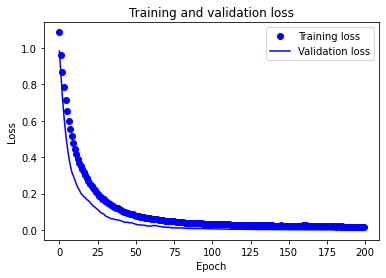

In [5]:
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 안내
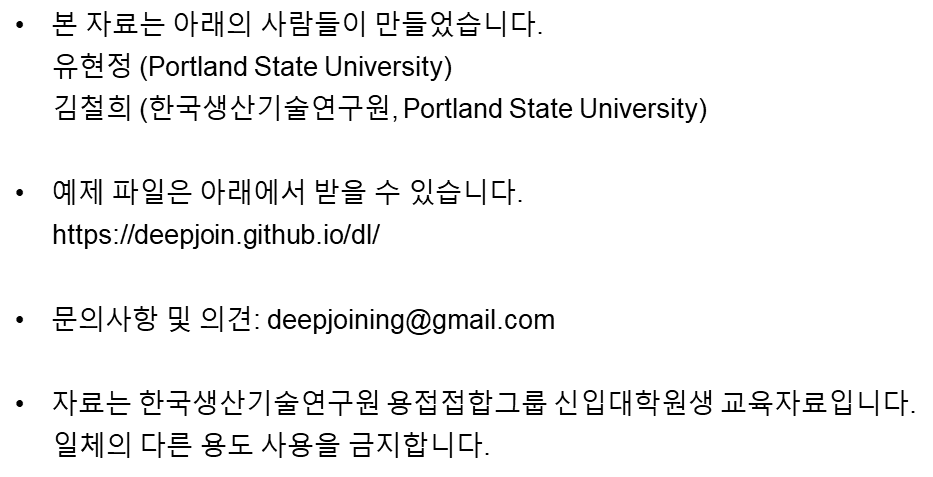

예제 파일은 아래에서 받을 수 있습니다.
     https://deepjoin.github.io/dl/

문의사항 및 의견: deepjoining@gmail.com